<a href="https://colab.research.google.com/github/nalenndra/PMI-GeneticAlg/blob/Project/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Clustering dan Optimasi Heuristik dalam penyusunan portofolio saham
Eps Genetik Algorithm dan Klastering DBSCAN
Mahardi Nalendra Syafa

# Data

In [ ]:
#read csv data
data_volatility = read.csv("/content/volatility_mean_data.csv")
head(data_volatility)

,X,Annual.Volatility,Mean.Log.Return
,<chr>,<dbl>,<dbl>
1,AMT,0.2403568,0.0001024872
2,ARE,0.2775588,-0.0001865644
3,AVB,0.1906657,0.0011811215
4,BXP,0.3208557,0.0011870293
5,CBRE,0.2728465,0.0020846553
6,CCI,0.2208264,-0.0002419013


In [ ]:
summary(data_volatility)

       X         Ticker            Volatility    
 Min.   : 0   Length:29          Min.   :0.1768  
 1st Qu.: 7   Class :character   1st Qu.:0.1948  
 Median :14   Mode  :character   Median :0.2208  
 Mean   :14                      Mean   :0.2260  
 3rd Qu.:21                      3rd Qu.:0.2510  
 Max.   :28                      Max.   :0.3209  

In [ ]:
install.packages(c("dbscan", "fpc"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




  cluster Volatility.mean Volatility.sd Volatility.median
1       1       0.2260233    0.03517891         0.2208264


cluster,Volatility.mean,Volatility.sd,Volatility.median
<dbl>,<dbl>,<dbl>,<dbl>
1,0.2260233,0.03517891,0.2208264


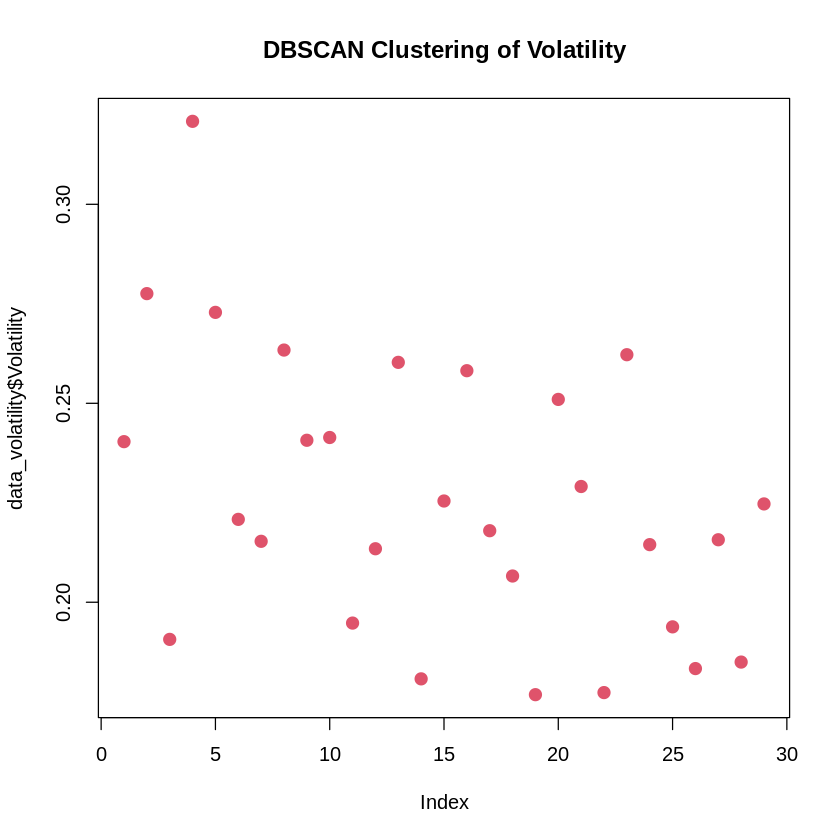

In [ ]:
# prompt: perform dbscan clustering for data_volatility$Volatility then visualize each cluster and do profiling

library(dbscan)
library(fpc)

# Perform DBSCAN clustering
set.seed(123) # for reproducibility
db <- dbscan(data_volatility$Volatility, eps = 0.5, MinPts = 3) # Adjust eps and MinPts as needed

# Visualize clusters
plot(data_volatility$Volatility, col = db$cluster + 1, pch = 20, cex = 2, main = "DBSCAN Clustering of Volatility")
points(data_volatility$Volatility[db$cluster == 0], col = "gray", pch = 8, cex = 1.5) # Highlight noise points

# Add cluster labels to the data
data_volatility$cluster <- db$cluster

# Cluster profiling
# Calculate summary statistics for each cluster
# Profiling Cluster: Memisahkan mean, sd, dan median dalam kolom yang terpisah
cluster_profiles <- aggregate(Volatility ~ cluster, data = data_volatility,
                             FUN = function(x) c(mean = mean(x), sd = sd(x), median = median(x)))

# Perbaiki agar hasilnya memiliki kolom yang terpisah untuk mean, sd, dan median
cluster_profiles <- do.call(data.frame, cluster_profiles)

# Menampilkan hasil profiling cluster
print(cluster_profiles)

cluster_profiles


In [ ]:
install.packages("ggplot2")
library(ggplot2)
 # untuk visualisasi

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



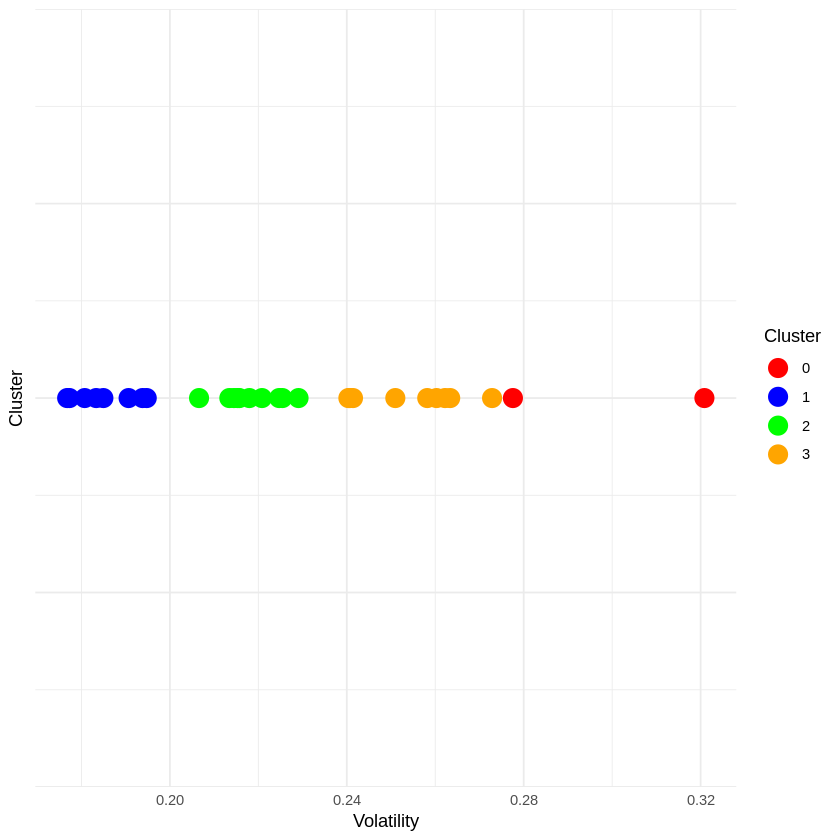

In [ ]:
# Mengambil kolom Volatility
volatility_data <- data_volatility$Volatility

# Menentukan parameter untuk DBSCAN
# eps adalah radius sekitar titik yang akan dianggap sebagai bagian dari cluster
# minPts adalah jumlah minimal titik dalam radius eps untuk dianggap sebagai cluster
dbscan_result <- dbscan(volatility_data, eps = 0.011)

# Menambahkan hasil clustering ke data frame
data_volatility$cluster <- dbscan_result$cluster
# Membuat plot untuk melihat hasil clustering
ggplot(data_volatility, aes(x = Volatility, y = 1, color = factor(cluster))) +
  geom_point(size = 5) +
  scale_color_manual(values = c("red", "blue", "green", "orange", "purple", "pink")) +
  labs(x = "Volatility", y = "Cluster", color = "Cluster") +
  theme_minimal() +
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank())



In [ ]:
# Profiling cluster berdasarkan Volatility
cluster_summary <- aggregate(Volatility ~ cluster, data = data_volatility, FUN = function(x) c(mean = mean(x), sd = sd(x), min = min(x), max = max(x)))

# Menampilkan hasil profiling cluster
print(cluster_summary)


  cluster Volatility.mean Volatility.sd Volatility.min Volatility.max
1       0     0.299207275   0.030615503    0.277558845    0.320855704
2       1     0.185293735   0.007094953    0.176773109    0.194763532
3       2     0.218357050   0.006714800    0.206592771    0.229086421
4       3     0.254482247   0.011705797    0.240356886    0.272846548


In [ ]:
# Select data points belonging to cluster 1
data_best_cluster = data_volatility[data_volatility$cluster == 1, ]
data_best_cluster

,X,Ticker,Volatility,cluster
,<int>,<chr>,<dbl>,<dbl>
3,2,AVB,0.1906657,1
11,10,EQR,0.1947635,1
14,13,FRT,0.1807445,1
19,18,O,0.1767731,1
22,21,REG,0.1772951,1
25,24,UDR,0.1938141,1
26,25,VICI,0.1833313,1
28,27,WELL,0.1849625,1


In [ ]:
best_ticker = data_best_cluster$Ticker
best_ticker

[1] "AVB"  "EQR"  "FRT"  "O"    "REG"  "UDR"  "VICI" "WELL"

# Clustering revise

In [ ]:
cluster_profiles

Cluster,Volatility_Mean,Volatility_SD,Volatility_Median,LogReturn_Mean,LogReturn_SD,LogReturn_Median
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2260233,0.03517892,0.2208264,0.0008914177,0.0006994318,0.001024378


,X,Annual.Volatility,Mean.Log.Return
,<chr>,<dbl>,<dbl>
1,AMT,0.2403568,0.0001024872
2,ARE,0.2775588,-0.0001865644
3,AVB,0.1906657,0.0011811215
4,BXP,0.3208557,0.0011870293
5,CBRE,0.2728465,0.0020846553
6,CCI,0.2208264,-0.0002419013


  Cluster Volatility_Mean Volatility_SD Volatility_Median LogReturn_Mean
1       0       0.3208557            NA         0.3208557   0.0011870293
2       1       0.2567899   0.013230795         0.2592375   0.0008241209
3       2       0.1852937   0.007094954         0.1841469   0.0009283296
4       3       0.2183571   0.006714768         0.2168406   0.0008996240
  LogReturn_SD LogReturn_Median
1           NA     0.0011870293
2 0.0009860587     0.0007991672
3 0.0004682339     0.0009319699
4 0.0006025850     0.0011494109


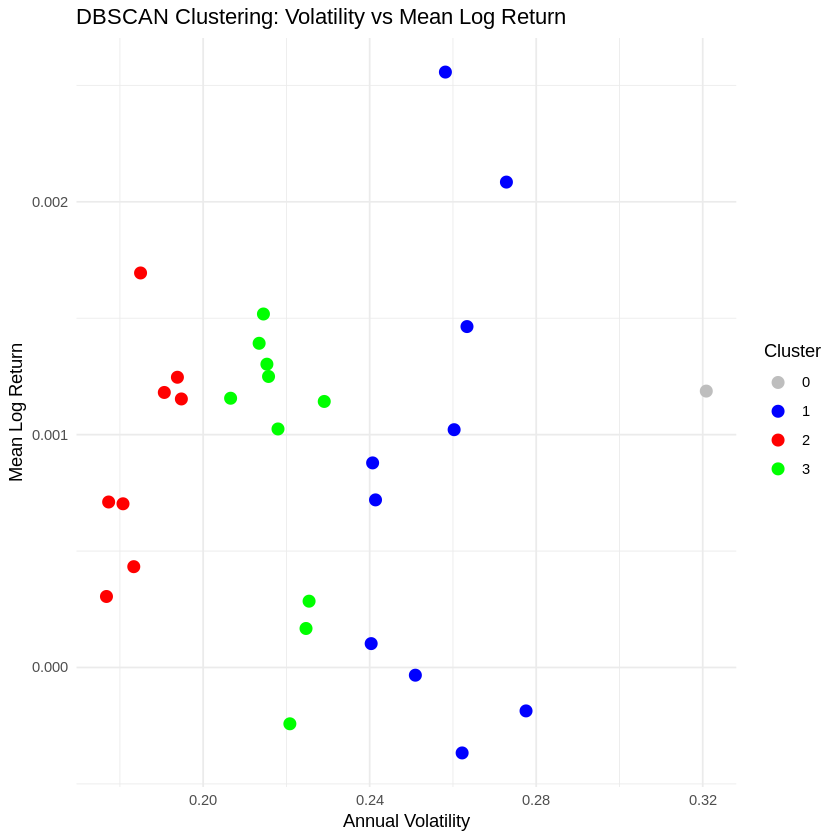

In [ ]:
library(dbscan)
library(fpc)
library(ggplot2)

# Read CSV data
data_volatility <- read.csv("/content/volatility_mean_data.csv")
head(data_volatility)

# Perform DBSCAN clustering using both Volatility and Mean.Log.Return
set.seed(123)  # For reproducibility
data_for_clustering <- data_volatility[, c("Annual.Volatility", "Mean.Log.Return")]

# Perform DBSCAN clustering
db <- dbscan(data_for_clustering, eps = 0.01, MinPts = 3)  # Adjust eps and MinPts as needed

# Add cluster labels to the data
data_volatility$cluster <- db$cluster

# Visualize clusters (2D plot: Volatility vs Mean Log Return)
ggplot(data_volatility, aes(x = Annual.Volatility, y = Mean.Log.Return, color = as.factor(cluster))) +
  geom_point(size = 3) +
  scale_color_manual(values = c("gray", "blue", "red", "green", "purple")) +
  labs(title = "DBSCAN Clustering: Volatility vs Mean Log Return",
       x = "Annual Volatility", y = "Mean Log Return", color = "Cluster") +
  theme_minimal()

# Cluster profiling: Summary statistics for each cluster
cluster_profiles <- aggregate(cbind(Annual.Volatility, Mean.Log.Return) ~ cluster,
                              data = data_volatility,
                              FUN = function(x) c(mean = mean(x), sd = sd(x), median = median(x)))

# Flatten the data so it looks cleaner
cluster_profiles <- do.call(data.frame, cluster_profiles)

# Rename columns for clarity
names(cluster_profiles) <- c("Cluster", "Volatility_Mean", "Volatility_SD", "Volatility_Median",
                             "LogReturn_Mean", "LogReturn_SD", "LogReturn_Median")

# Display cluster profiles
print(cluster_profiles)



In [ ]:
cluster_profiles

Cluster,Volatility_Mean,Volatility_SD,Volatility_Median,LogReturn_Mean,LogReturn_SD,LogReturn_Median
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.3208557,NA,0.3208557,0.0011870293,NA,0.0011870293
1,0.2567899,0.013230795,0.2592375,0.0008241209,0.0009860587,0.0007991672
2,0.1852937,0.007094954,0.1841469,0.0009283296,0.0004682339,0.0009319699
3,0.2183571,0.006714768,0.2168406,0.0008996240,0.0006025850,0.0011494109


,X,Annual.Volatility,Mean.Log.Return
,<chr>,<dbl>,<dbl>
1,AMT,0.2403568,0.0001024872
2,ARE,0.2775588,-0.0001865644
3,AVB,0.1906657,0.0011811215
4,BXP,0.3208557,0.0011870293
5,CBRE,0.2728465,0.0020846553
6,CCI,0.2208264,-0.0002419013


  Cluster Volatility_Mean Volatility_SD Volatility_Median LogReturn_Mean
1       0       0.3208557            NA         0.3208557   0.0011870293
2       1       0.2567899   0.013230795         0.2592375   0.0008241209
3       2       0.1852937   0.007094954         0.1841469   0.0009283296
4       3       0.2183571   0.006714768         0.2168406   0.0008996240
  LogReturn_SD LogReturn_Median
1           NA     0.0011870293
2 0.0009860587     0.0007991672
3 0.0004682339     0.0009319699
4 0.0006025850     0.0011494109
      X Annual.Volatility Mean.Log.Return cluster
3   AVB         0.1906657    0.0011811215       2
11  EQR         0.1947635    0.0011532423       2
14  FRT         0.1807445    0.0007030004       2
19    O         0.1767730    0.0003048780       2
22  REG         0.1772950    0.0007106974       2
25  UDR         0.1938141    0.0012464397       2
26 VICI         0.1833314    0.0004329239       2
28 WELL         0.1849624    0.0016943334       2


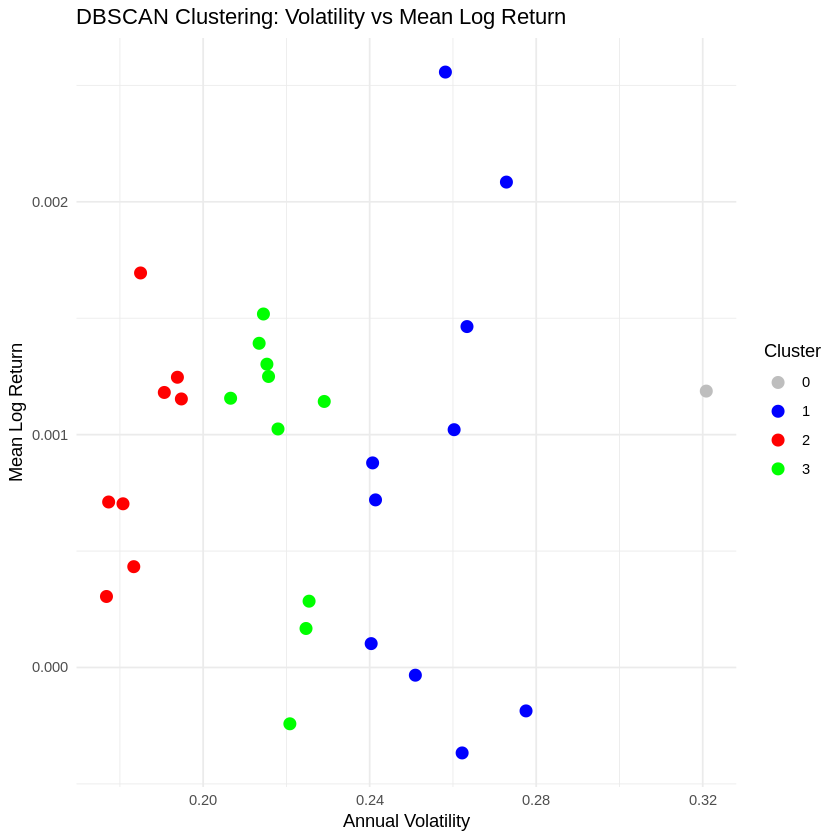

In [ ]:
library(dbscan)
library(fpc)
library(ggplot2)

# Read CSV data
data_volatility <- read.csv("/content/volatility_mean_data.csv")
head(data_volatility)

# Perform DBSCAN clustering using both Volatility and Mean.Log.Return
set.seed(123)  # For reproducibility
data_for_clustering <- data_volatility[, c("Annual.Volatility", "Mean.Log.Return")]

# Perform DBSCAN clustering
db <- dbscan(data_for_clustering, eps = 0.01, MinPts = 3)  # Adjust eps and MinPts as needed

# Add cluster labels to the data
data_volatility$cluster <- db$cluster

# Visualize clusters (2D plot: Volatility vs Mean Log Return)
ggplot(data_volatility, aes(x = Annual.Volatility, y = Mean.Log.Return, color = as.factor(cluster))) +
  geom_point(size = 3) +
  scale_color_manual(values = c("gray", "blue", "red", "green", "purple")) +
  labs(title = "DBSCAN Clustering: Volatility vs Mean Log Return",
       x = "Annual Volatility", y = "Mean Log Return", color = "Cluster") +
  theme_minimal()

# Cluster profiling: Summary statistics for each cluster
cluster_profiles <- aggregate(cbind(Annual.Volatility, Mean.Log.Return) ~ cluster,
                              data = data_volatility,
                              FUN = function(x) c(mean = mean(x), sd = sd(x), median = median(x)))

# Flatten the data so it looks cleaner
cluster_profiles <- do.call(data.frame, cluster_profiles)

# Rename columns for clarity
names(cluster_profiles) <- c("Cluster", "Volatility_Mean", "Volatility_SD", "Volatility_Median",
                             "LogReturn_Mean", "LogReturn_SD", "LogReturn_Median")

# Display cluster profiles
print(cluster_profiles)

# Filter rows where cluster is 2
cluster_2_data <- data_volatility[data_volatility$cluster == 2, ]

# Print only rows where cluster is 2
print(cluster_2_data)


# Analisis Metaheuristik : Genetic Algorithm

In [ ]:
install.packages(c("GA", "MASS", "VGAM", "rrcov", "quadprog"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘RcppArmadillo’, ‘mvtnorm’, ‘pcaPP’




In [ ]:
library(GA)
library(MASS)
library(VGAM)
library(rrcov)
library(quadprog)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: stats4

Loading required package: splines

Loading required package: robustbase

Scalable Robust Estimators with High Breakdown Point (version 1.7-6)




## data

In [ ]:
data_saham = read.csv("/content/log_return_data.csv")
summary(data_saham)

     Date                AMT                  ARE            
 Length:250         Min.   :-0.0796882   Min.   :-0.0542216  
 Class :character   1st Qu.:-0.0079444   1st Qu.:-0.0100177  
 Mode  :character   Median : 0.0003262   Median :-0.0016638  
                    Mean   : 0.0001025   Mean   :-0.0001866  
                    3rd Qu.: 0.0085753   3rd Qu.: 0.0095625  
                    Max.   : 0.0516490   Max.   : 0.0710432  
      AVB                 BXP                 CBRE          
 Min.   :-0.029389   Min.   :-0.062723   Min.   :-0.051950  
 1st Qu.:-0.006303   1st Qu.:-0.011816   1st Qu.:-0.007402  
 Median : 0.001823   Median : 0.001476   Median : 0.001823  
 Mean   : 0.001181   Mean   : 0.001187   Mean   : 0.002085  
 3rd Qu.: 0.008758   3rd Qu.: 0.013988   3rd Qu.: 0.010420  
 Max.   : 0.051013   Max.   : 0.081672   Max.   : 0.088815  
      CCI                  CPT                 DLR           
 Min.   :-0.0493100   Min.   :-0.029886   Min.   :-0.087054  
 1st Qu.:-0.008

In [ ]:
best_ticker

[1] "AVB"  "EQR"  "FRT"  "O"    "REG"  "UDR"  "VICI" "WELL"

In [ ]:
# Select specific columns from data_saham
best_ticker <- c("AVB", "EQR", "FRT", "O", "REG", "UDR", "VICI", "WELL")
data_saham_subset <- data_saham[, best_ticker]

# Print the subset
head(data_saham_subset)

,AVB,EQR,FRT,O,REG,UDR,VICI,WELL
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.011202453,-0.0075253228,-0.0013022128,-0.0110458405,-0.008945071,-0.002024527,-0.0095379724,0.0006676936
2,-0.004390477,0.0003433008,-0.0072426215,-0.0038311583,-0.012157316,0.003756630,-0.0006610602,-0.0277513077
3,0.002226274,0.0073524003,-0.0004039502,-0.0003655862,-0.004715506,0.009473245,0.0062633585,0.0010291184
4,0.002107343,0.0020422104,0.0011103503,-0.0152925991,0.007690481,0.010515999,0.0026254810,0.0023967203
5,-0.001936414,-0.0111122944,0.0020156437,0.0097921875,0.005768268,-0.011087477,0.0091355060,0.0039819902
6,-0.003311984,0.0001719694,0.0001007277,0.0016533322,-0.001244382,0.013346727,-0.0019506277,0.0059999571


In [ ]:
# Menampilkan rata-rata return per saham
mean_returns <- colMeans(data_saham_subset)
cat("Rata-rata Return Saham:\n")
print(mean_returns)

# Matriks kovarians return
cov_matrix <- cov(data_saham_subset)
cat("\nMatriks Kovarians:\n")
print(cov_matrix)

Rata-rata Return Saham:
         AVB          EQR          FRT            O          REG          UDR 
0.0011811219 0.0011532421 0.0007030004 0.0003048780 0.0007106972 0.0012464397 
        VICI         WELL 
0.0004329239 0.0016943330 

Matriks Kovarians:
              AVB          EQR          FRT            O          REG
AVB  1.442596e-04 1.330573e-04 8.981427e-05 7.624920e-05 8.728978e-05
EQR  1.330573e-04 1.505271e-04 8.472428e-05 8.065378e-05 7.998404e-05
FRT  8.981427e-05 8.472428e-05 1.296372e-04 8.082747e-05 1.081014e-04
O    7.624920e-05 8.065378e-05 8.082747e-05 1.240029e-04 7.964554e-05
REG  8.728978e-05 7.998404e-05 1.081014e-04 7.964554e-05 1.247363e-04
UDR  1.275368e-04 1.320769e-04 8.892694e-05 8.085628e-05 8.511784e-05
VICI 7.208823e-05 7.749765e-05 8.479882e-05 9.332451e-05 8.192996e-05
WELL 7.710629e-05 7.826768e-05 6.907150e-05 5.976097e-05 7.346586e-05
              UDR         VICI         WELL
AVB  1.275368e-04 7.208823e-05 7.710629e-05
EQR  1.320769e-04 7.749765

In [ ]:
# Fungsi GA (Genetic Algorithm)
Rf <- 0.06 / 365 # suku bunga acuan 6%
GA.S <- function(x, y, z){
  fungsi <- function(x){
    ((t(x) %*% y) - Rf) / sqrt(t(x) %*% z %*% x)
  }
  gaControl("real-valued" = list(selection = "ga_tourSelection",
                                 crossover = "gabin_uCrossover",
                                 mutation = 'gareal_raMutatioon'))
  Genal <- ga(type = "real-valued", fitness = fungsi, lower = rep(0, ncol(x)),
              upper = rep(1, ncol(x)), population = gaControl("real-valued")$population,
              selection = gaControl("real-valued")$selection,
              crossover = gaControl("binary")$crossover,
              mutation = gaControl("real-valued")$mutation,
              popSize = 50, pcrossover = 0.8, pmutation = 0.1, elitism = 3,
              maxiter = 500, run = 100 ,monitor = TRUE, seed = 123)
  print(summary(Genal))
  cat("\nSolusi yang diperoleh dengan menggunakan GA adalah:\n")
  print(Genal@solution)
}

# Fungsi untuk menghitung bobot portofolio
bobot <- function(x){
  drop(x / sum(x))
}

# Menghitung bobot portofolio menggunakan GA
GAs_normal <- GA.S(data_saham_subset, mean_returns, cov_matrix)
wga_normal <- bobot(GAs_normal)
cat("\nBobot Portofolio yang Diperoleh:\n")
print(wga_normal)


GA | iter = 1 | Mean = 0.09028684 | Best = 0.10998176
GA | iter = 2 | Mean = 0.09642408 | Best = 0.10998176
GA | iter = 3 | Mean = 0.1003594 | Best = 0.1160594
GA | iter = 4 | Mean = 0.1038002 | Best = 0.1170443
GA | iter = 5 | Mean = 0.1068314 | Best = 0.1183860
GA | iter = 6 | Mean = 0.111330 | Best = 0.118386
GA | iter = 7 | Mean = 0.1133629 | Best = 0.1203758
GA | iter = 8 | Mean = 0.1151254 | Best = 0.1203758
GA | iter = 9 | Mean = 0.1151889 | Best = 0.1205407
GA | iter = 10 | Mean = 0.1159087 | Best = 0.1219662
GA | iter = 11 | Mean = 0.1177529 | Best = 0.1219662
GA | iter = 12 | Mean = 0.1177750 | Best = 0.1219662
GA | iter = 13 | Mean = 0.1187707 | Best = 0.1222317
GA | iter = 14 | Mean = 0.1194422 | Best = 0.1224087
GA | iter = 15 | Mean = 0.1197664 | Best = 0.1236817
GA | iter = 16 | Mean = 0.1194574 | Best = 0.1236817
GA | iter = 17 | Mean = 0.1202074 | Best = 0.1236817
GA | iter = 18 | Mean = 0.1202637 | Best = 0.1236817
GA | iter = 19 | Mean = 0.1212044 | Best = 0.1254743


In [ ]:
wga_normal

x1           x2           x3           x4           x5           x6 
0.0043311559 0.0022271502 0.0005628053 0.0003469251 0.0001915450 0.2885861493 
          x7           x8 
0.0025689526 0.7011853165

In [ ]:
weights <- c(0.0043311559, 0.0022271502, 0.0005628053, 0.0003469251,
             0.0001915450, 0.2885861493, 0.0025689526, 0.7011853165)

In [ ]:
cov_matrix

,AVB,EQR,FRT,O,REG,UDR,VICI,WELL
AVB,1.442596e-04,1.330573e-04,8.981427e-05,7.624920e-05,8.728978e-05,1.275368e-04,7.208823e-05,7.710629e-05
EQR,1.330573e-04,1.505271e-04,8.472428e-05,8.065378e-05,7.998404e-05,1.320769e-04,7.749765e-05,7.826768e-05
FRT,8.981427e-05,8.472428e-05,1.296372e-04,8.082747e-05,1.081014e-04,8.892694e-05,8.479882e-05,6.907150e-05
O,7.624920e-05,8.065378e-05,8.082747e-05,1.240029e-04,7.964554e-05,8.085628e-05,9.332451e-05,5.976097e-05
REG,8.728978e-05,7.998404e-05,1.081014e-04,7.964554e-05,1.247363e-04,8.511784e-05,8.192996e-05,7.346586e-05
UDR,1.275368e-04,1.320769e-04,8.892694e-05,8.085628e-05,8.511784e-05,1.490632e-04,7.481700e-05,7.249870e-05
VICI,7.208823e-05,7.749765e-05,8.479882e-05,9.332451e-05,8.192996e-05,7.481700e-05,1.333745e-04,6.184294e-05
WELL,7.710629e-05,7.826768e-05,6.907150e-05,5.976097e-05,7.346586e-05,7.249870e-05,6.184294e-05,1.357584e-04


In [ ]:
# Return portofolio (menggunakan bobot yang sudah dihitung)
port_return <- sum(weights * colMeans(data_saham_subset))  # R_p

# Volatilitas portofolio (menggunakan bobot dan matriks kovarians)
port_volatility <- sqrt(t(weights) %*% cov_matrix %*% weights)  # sigma_p

# Risk-free rate per hari (misalnya 0.0475/365 untuk tahunan 4.75%)
Rf <- 0.06 / 365

# Sharpe Ratio
sharpe_ratio <- (port_return - Rf) / port_volatility

# Output hasil Sharpe Ratio
cat("Sharpe Ratio: ", sharpe_ratio, "\n")

Sharpe Ratio:  0.1326737 


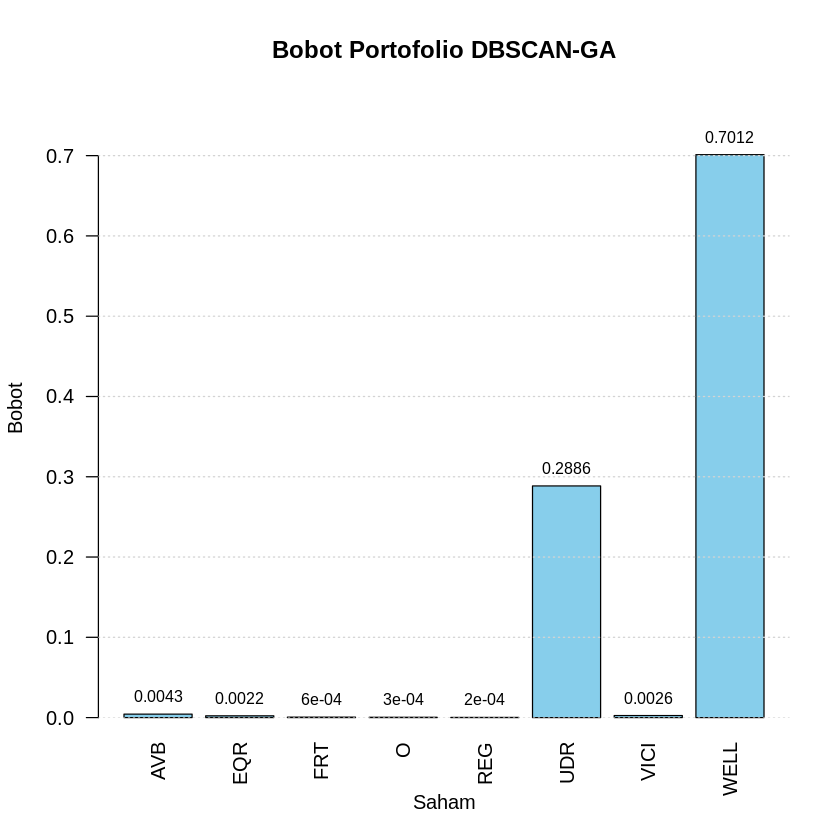

In [ ]:
# prompt: BARPLOT wga_normal, add label in each bar descending, add grid

# Create a barplot of wga_normal with descending labels and grid
barplot(wga_normal,
        main = "Bobot Portofolio DBSCAN-GA",
        xlab = "Saham",
        ylab = "Bobot",
        names.arg = best_ticker, # Set stock names as labels
        las = 2,  # Rotate x-axis labels vertically
        col = "skyblue", # Set bar color
        ylim = c(0, max(wga_normal) * 1.1)) # Adjust y-axis limit for better label visibility

# Add labels on top of each bar
text(x = barplot(wga_normal, plot = FALSE), y = wga_normal, label = round(wga_normal, 4), pos = 3, cex = 0.8, col="black")

# Add grid lines
grid(nx = NA, ny = NULL)

# Hasil Hierarchial

In [ ]:
# Select specific columns from data_saham
best_ticker <- c("AVB", "CPT", "EQR", "ESS", "KIM", "MAA", "PSA", "SPG","UDR","VTR")
data_saham_subset <- data_saham[, best_ticker]

# Print the subset
head(data_saham_subset)

,AVB,CPT,EQR,ESS,KIM,MAA,PSA,SPG,UDR,VTR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.011202453,0.0000000000,-0.0075253228,-0.005672233,-0.0004866765,-0.003000644,-0.001746896,-0.000535043,-0.002024527,-0.005099911
2,-0.004390477,0.0037547815,0.0003433008,0.009748803,-0.0014856321,0.005363148,0.003082560,0.007237758,0.003756630,-0.018925257
3,0.002226274,0.0001070847,0.0073524003,0.005217143,-0.0024808052,0.000393219,0.012639545,0.011639684,0.009473245,0.003467758
4,0.002107343,0.0026730591,0.0020422104,0.005588000,0.0054495728,-0.000393219,0.002633127,0.011580887,0.010515999,0.010759699
5,-0.001936414,-0.0024589240,-0.0111122944,0.004236756,0.0054201329,-0.005521426,0.010969231,0.014197396,-0.011087477,0.004271638
6,-0.003311984,0.0072525147,0.0001719694,0.002375328,-0.0039389015,0.009446675,-0.003035650,-0.002153932,0.013346727,-0.004057622


In [ ]:
# Menampilkan rata-rata return per saham
mean_returns <- colMeans(data_saham_subset)
cat("Rata-rata Return Saham:\n")
print(mean_returns)

# Matriks kovarians return
cov_matrix <- cov(data_saham_subset)
cat("\nMatriks Kovarians:\n")
print(cov_matrix)

Rata-rata Return Saham:
        AVB         CPT         EQR         ESS         KIM         MAA 
0.001181122 0.001302552 0.001153242 0.001392312 0.001024377 0.001156317 
        PSA         SPG         UDR         VTR 
0.001142504 0.001518127 0.001246440 0.001249789 

Matriks Kovarians:
             AVB          CPT          EQR          ESS          KIM
AVB 1.442596e-04 1.274259e-04 1.330573e-04 1.410871e-04 1.052430e-04
CPT 1.274259e-04 1.839646e-04 1.291442e-04 1.432638e-04 1.064581e-04
EQR 1.330573e-04 1.291442e-04 1.505271e-04 1.444635e-04 9.784604e-05
ESS 1.410871e-04 1.432638e-04 1.444635e-04 1.807874e-04 1.109702e-04
KIM 1.052430e-04 1.064581e-04 9.784604e-05 1.109702e-04 1.885456e-04
MAA 1.209191e-04 1.574203e-04 1.199446e-04 1.342825e-04 1.037231e-04
PSA 1.076483e-04 1.186458e-04 1.095428e-04 1.209230e-04 1.318437e-04
SPG 9.687766e-05 9.323345e-05 9.485054e-05 1.072587e-04 1.230274e-04
UDR 1.275368e-04 1.403296e-04 1.320769e-04 1.465061e-04 1.029514e-04
VTR 9.452382e-05 1.049

In [ ]:
# Fungsi GA (Genetic Algorithm)
Rf <- 0.06 / 365 # suku bunga acuan 6%
GA.S <- function(x, y, z){
  fungsi <- function(x){
    ((t(x) %*% y) - Rf) / sqrt(t(x) %*% z %*% x)
  }
  gaControl("real-valued" = list(selection = "ga_tourSelection",
                                 crossover = "gabin_uCrossover",
                                 mutation = 'gareal_raMutatioon'))
  Genal <- ga(type = "real-valued", fitness = fungsi, lower = rep(0, ncol(x)),
              upper = rep(1, ncol(x)), population = gaControl("real-valued")$population,
              selection = gaControl("real-valued")$selection,
              crossover = gaControl("binary")$crossover,
              mutation = gaControl("real-valued")$mutation,
              popSize = 50, pcrossover = 0.8, pmutation = 0.1, elitism = 3,
              maxiter = 500, run = 100 ,monitor = TRUE, seed = 123)
  print(summary(Genal))
  cat("\nSolusi yang diperoleh dengan menggunakan GA adalah:\n")
  print(Genal@solution)
}

# Fungsi untuk menghitung bobot portofolio
bobot <- function(x){
  drop(x / sum(x))
}

# Menghitung bobot portofolio menggunakan GA
GAs_normal <- GA.S(data_saham_subset, mean_returns, cov_matrix)
wga_normal <- bobot(GAs_normal)
cat("\nBobot Portofolio yang Diperoleh:\n")
print(wga_normal)


GA | iter = 1 | Mean = 0.1082719 | Best = 0.1135152
GA | iter = 2 | Mean = 0.1094203 | Best = 0.1159023
GA | iter = 3 | Mean = 0.1116080 | Best = 0.1159023
GA | iter = 4 | Mean = 0.1130365 | Best = 0.1159023
GA | iter = 5 | Mean = 0.1138867 | Best = 0.1165441
GA | iter = 6 | Mean = 0.1144775 | Best = 0.1165441
GA | iter = 7 | Mean = 0.1152873 | Best = 0.1167003
GA | iter = 8 | Mean = 0.1156204 | Best = 0.1168954
GA | iter = 9 | Mean = 0.1160217 | Best = 0.1168999
GA | iter = 10 | Mean = 0.1163091 | Best = 0.1170540
GA | iter = 11 | Mean = 0.1165748 | Best = 0.1170965
GA | iter = 12 | Mean = 0.1163080 | Best = 0.1172883
GA | iter = 13 | Mean = 0.1165262 | Best = 0.1172883
GA | iter = 14 | Mean = 0.1167735 | Best = 0.1172883
GA | iter = 15 | Mean = 0.1169040 | Best = 0.1175411
GA | iter = 16 | Mean = 0.1168747 | Best = 0.1175411
GA | iter = 17 | Mean = 0.1169865 | Best = 0.1175411
GA | iter = 18 | Mean = 0.1171354 | Best = 0.1176602
GA | iter = 19 | Mean = 0.1171025 | Best = 0.1177239
GA

In [ ]:
best_ticker

[1] "AVB" "CPT" "EQR" "ESS" "KIM" "MAA" "PSA" "SPG" "UDR" "VTR"

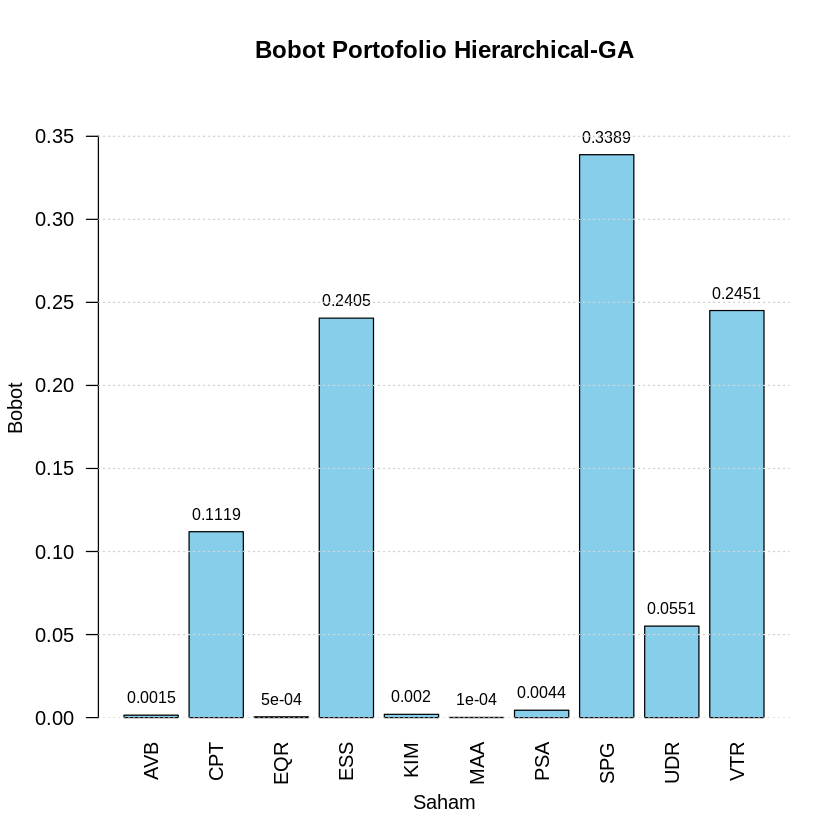

In [ ]:
# prompt: BARPLOT wga_normal, add label in each bar descending, add grid

# Create a barplot of wga_normal with descending labels and grid
barplot(wga_normal,
        main = "Bobot Portofolio Hierarchical-GA",
        xlab = "Saham",
        ylab = "Bobot",
        names.arg = best_ticker, # Set stock names as labels
        las = 2,  # Rotate x-axis labels vertically
        col = "skyblue", # Set bar color
        ylim = c(0, max(wga_normal) * 1.1)) # Adjust y-axis limit for better label visibility

# Add labels on top of each bar
text(x = barplot(wga_normal, plot = FALSE), y = wga_normal, label = round(wga_normal, 4), pos = 3, cex = 0.8, col="black")

# Add grid lines
grid(nx = NA, ny = NULL)

In [ ]:
wga_normal

x1           x2           x3           x4           x5           x6 
1.462629e-03 1.119450e-01 4.706634e-04 2.405205e-01 1.963863e-03 9.239734e-05 
          x7           x8           x9          x10 
4.426533e-03 3.389215e-01 5.510545e-02 2.450915e-01

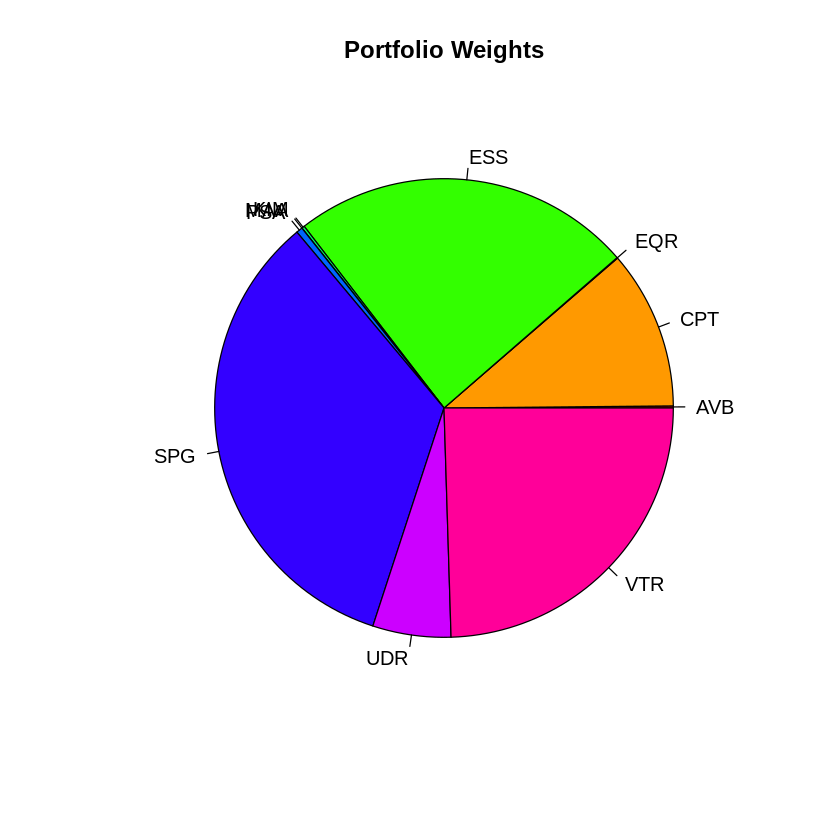

In [ ]:
# prompt: piechart wga_normal

pie(wga_normal, labels = best_ticker, main = "Portfolio Weights", col = rainbow(length(wga_normal)))

In [ ]:
weights <- c(0.00146262926514034, 0.111945015578212, 0.000470663441895037, 0.240520487593223, 0.00196386254673065,
              9.23973404789722e-05, 0.00442653316776912,0.338921489839683,0.0551054528783422, 0.245091468348525 )

In [ ]:
weights

[1] 1.462629e-03 1.119450e-01 4.706634e-04 2.405205e-01 1.963863e-03
 [6] 9.239734e-05 4.426533e-03 3.389215e-01 5.510545e-02 2.450915e-01

In [ ]:
# Return portofolio (menggunakan bobot yang sudah dihitung)
port_return <- sum(weights * colMeans(data_saham_subset))  # R_p

# Volatilitas portofolio (menggunakan bobot dan matriks kovarians)
port_volatility <- sqrt(t(weights) %*% cov_matrix %*% weights)  # sigma_p

# Risk-free rate per hari (misalnya 0.0475/365 untuk tahunan 4.75%)
Rf <- 0.06 / 365

# Sharpe Ratio
sharpe_ratio <- (port_return - Rf) / port_volatility

# Output hasil Sharpe Ratio
cat("Sharpe Ratio: ", sharpe_ratio, "\n")

Sharpe Ratio:  0.109562 
